In [24]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Function to load images and labels
def load_images_from_folders(folders):
    images = []
    labels = []
    for folder in folders:
        label = os.path.basename(folder)
        print(label)
        for filename in os.listdir(folder):
            img_path = os.path.join(folder, filename)
            try:
                with Image.open(img_path) as img:
                    img = img.resize((224, 224))
                    images.append(np.array(img))
                    labels.append(label)
            except IOError:
                pass
    return np.array(images), np.array(labels)

# Preprocess and split data
folders = ['PCOS_form/infected', 'PCOS_form/normal']
X, y = load_images_from_folders(folders)
X = X.reshape(X.shape[0], -1)  # Flatten images
label_map = {'normal': 0, 'infected': 1}  # Assign a default value for empty string label
y = np.array([label_map.get(label, -1) for label in y])  # Convert labels to binary


infected
normal


In [18]:
print(X.shape, y)

(14943, 150528) [1 1 1 ... 0 0 0]


In [19]:
# Splitting data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



In [20]:
# XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, objective='binary:logistic', eval_metric='logloss')
model.fit(X_train, y_train)

# Validation
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_roc_auc = roc_auc_score(y_val, y_val_pred)
print("Validation Accuracy:", val_accuracy)
print("Validation ROC AUC:", val_roc_auc)

# Testing
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)
print("Test ROC AUC:", test_roc_auc)



Validation Accuracy: 0.999553770638108
Validation ROC AUC: 0.9995499549954996
Test Accuracy: 0.9973238180196253
Test ROC AUC: 0.9973517830292831


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1103
           1       1.00      1.00      1.00      1139

    accuracy                           1.00      2242
   macro avg       1.00      1.00      1.00      2242
weighted avg       1.00      1.00      1.00      2242

Confusion Matrix:



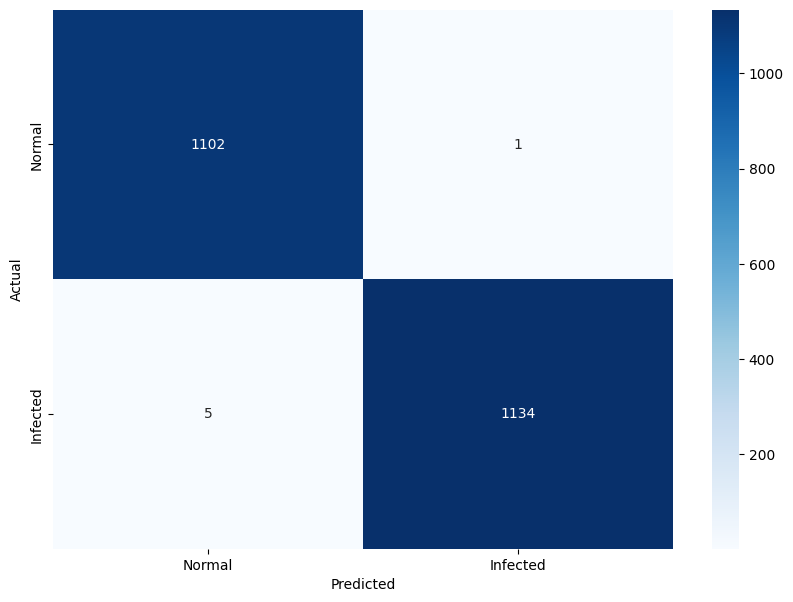

In [25]:


# Classification Report and Confusion Matrix
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n")
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Normal', 'Infected'], yticklabels=['Normal', 'Infected'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [26]:
def preprocess_image(image_path):
    with Image.open(image_path) as img:
        img = img.resize((224, 224))
        img_array = np.array(img)
        img_array = img_array.flatten()  # Flatten the image
        img_array = img_array.reshape(1, -1)  # Reshape for model input
    return img_array

In [41]:
image_path = 'Image_1.jpg'
img = preprocess_image(image_path)
prob = model.predict_proba(img)[0]
# Displaying probabilities
print("Probability Distribution:")
print("Normal: {:.6f}, Infected: {:.6f}".format(prob[0], prob[1]))


Probability Distribution:
Normal: 0.000025, Infected: 0.999975


In [42]:
image_path = 'Image_2.jpg'
img = preprocess_image(image_path)
prob = model.predict_proba(img)[0]
# Displaying probabilities
print("Probability Distribution:")
print("Normal: {:.6f}, Infected: {:.6f}".format(prob[0], prob[1]))

Probability Distribution:
Normal: 0.000002, Infected: 0.999998


In [43]:
image_path = 'Image_3.jpg'
img = preprocess_image(image_path)
prob = model.predict_proba(img)[0]
# Displaying probabilities
print("Probability Distribution:")
print("Normal: {:.6f}, Infected: {:.6f}".format(prob[0], prob[1]))

Probability Distribution:
Normal: 0.000005, Infected: 0.999995


In [44]:
image_path = 'C:/Vijay/BayesianCNN/PCOS_form/normal/8.jpg'
img = preprocess_image(image_path)
prob = model.predict_proba(img)[0]
# Displaying probabilities
print("Probability Distribution:")
print("Normal: {:.6f}, Infected: {:.6f}".format(prob[0], prob[1]))

Probability Distribution:
Normal: 0.999970, Infected: 0.000030


In [46]:
import pickle

# Assuming 'model' is your trained XGBoost model
filename = 'trained_xgboost_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

In [47]:
import pickle

# Load the model from the file
filename = 'trained_xgboost_model.pkl'
with open(filename, 'rb') as file:
    loaded_model = pickle.load(file)

In [48]:
image_path = 'C:/Vijay/BayesianCNN/PCOS_form/normal/55.jpg'
img = preprocess_image(image_path)
prob = loaded_model.predict_proba(img)[0]
# Displaying probabilities
print("Probability Distribution:")
print("Normal: {:.6f}, Infected: {:.6f}".format(prob[0], prob[1]))

Probability Distribution:
Normal: 0.999941, Infected: 0.000059
